<a href="https://colab.research.google.com/github/ZuckermanLab/T32_Nanocourse/blob/main/ProbabilityEtc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
a = 4
b = 5
c = 6
print(a,b,c)

In [ ]:
# do some math
f = b * c
print(f)

In [ ]:
print(f"a = {a}    b = {b}    c = {c}")  # The f enables printing values within a (quoted) string
print(a, "\n", b, "\n", c)  # lots of ways to print things - "\n" is new line 'character'

In [ ]:
a = 7

In [ ]:
# ORDER MATTERS IN PYTHON NOTEBOOKS - BE CAREFUL!
print(a)
# re-run first definition of a above and print again

In [ ]:
# LISTS AND LOOPS ARE KEY ELEMENTS OF PYTHON COMPUTING AND DATA ANALYSIS
instructors = ["Olga", "Nick", "Luke", "John", "Dan", "Jeremy"]  # a list of strings
quant = len(instructors)  # number of elements in the list
print(f"There are {quant} instructors:")
for teacher in instructors:  # The colon ":" here indicates the following line(s) depend on this line
  print(teacher)  # ALL INDENTED LINES DEPEND ON ALL PREVIOUS NON-INDENTED LINES

In [ ]:
from random import *  # we often want to use a library of functions that is not part of basic python
max = 20
rand_list = []  # blank list to start
count = 0
while (count < max):
  count = count + 1
  rand_list.append( random() )  # random with empty argument "()" gives a number between 0 and 1
print(f"We obtained {len(rand_list)} elements")
print(rand_list)

In [ ]:
# Make a new list by doing some math on every element of a list
squaredvals = []  # empty list
for number in rand_list:
  squared = number**2
  squaredvals.append( squared )
  print(number, squared)   # good to print things to check program is performing correctly

In [ ]:
# NUMERICAL PYTHON - NUMPY
# Every mathematical operation has a better implementation in numpy - faster, less memory
import numpy as np  # we can make our own abbreviation - np is typical
count = 20
array_rand = np.random.rand(count)  # a single command accomplishes same as our loop above
# Note this is an ARRAY, not a list.  Arrays can be very complex objects - e.g., like matrices.
print( array_rand )
sq_array = array_rand**2.0  # a single command does the same operation on ALL elements
print ( sq_array )

In [ ]:
# turn it into a function
def square_this_array( input_array ):
  return input_array**2.0
print( array_rand )
array2 = square_this_array( array_rand )
print( array2 )


NUMBER ONE THING TO KNOW ABOUT PYTHON - 
WHATEVER YOU WANT TO DO, IT'S SAFE TO ASSUME SOMEONE HAS DONE IT BEFORE ...
SO GOOGLE IT.  Finding the precise thing you want may take some rephrasing of your search, or tweaking exisiting code.  But
DON'T BE AFRAID TO EXPERIMENT - IT'S JUST CODE!

In [ ]:
# Probability distributions in one dimension (1D)
# Bin size matters!!
import matplotlib.pyplot as plt
u5 = plt.hist(array_rand, bins = 5)
u10 = plt.hist(array_rand, bins = 10)

In [ ]:
# Make plots a little easier to understand
u5 = plt.hist(array_rand, bins = 5)
u10 = plt.hist(array_rand, bins = 10, alpha=0.5)  # alpha is transparency parameter

In [ ]:
# Better use a density!
# DEFINE
nbin = 5
u5_norm = plt.hist(array_rand, bins = nbin, density=True)
nbin = 10
u10_norm = plt.hist(array_rand, bins = nbin, density=True)
plt.show(u5_norm, u10_norm)
# How to 'reality check' a density?  Guesstimate the area

In [ ]:
# Noise and sampling - Less data, less idea what's going on
# Noisy data could support different hypotheses!
# Let's examine effects of having more data
def make_array_rand_plot( count ):  # function to make histogram
  tmp_array = np.random.rand(count)  # compare to code above
  return plt.hist(tmp_array, density=True)
unorm_20 = make_array_rand_plot( 20 )
unorm_200 = make_array_rand_plot( 200 )
unorm_2000 = make_array_rand_plot( 2000 )
plt.show()
# Run cell multiple times to see range of outcomes (due to random noise)

In [ ]:
# The difference between variance and uncertainty
# Variance - often measured by standard deviation - tells us the 
# amount of variability expected among samples from a distribution
# (e.g., from repeated runs of an experiment)
# Uncertainty, on the other hand, tells us the precision with
# which we know a certain value.  If we have made many measurements,
# the uncertainty can be *much* smaller than the standard deviation.
# How many replicates is enough?  That depends on the question you
# want to answer.  For example, it's easy to distinguish the average
# height of adults from those of pre-school children, but distinguishing
# the average heights of 13 vs. 14-year-olds would require many measurements.
mu1 = 10.0
sigma1 = 1.0
data1 = np.random.randn(1000) * sigma1 + mu1
plt.hist(data1, density=True)
mu2 = 0.25
sigma2 = 0.25
data2 = np.random.randn(10) * sigma2 + mu2
plt.hist(data2, density=True)
plt.show()
# We can have a very precise estimate of the mean of a data set with large variance
# We might have a poor estimate of the mean of a low-variance data set - 'poor'
# in the sense that we cannot be confident the mean is positive in this case.

# Visualizing distributions

In [ ]:
# 2D distributions and visualizations (John)
# contour plots, heat maps
# comparing 2D densities via heat map

In [ ]:
# Marginalizing/projecting: 2D -> 1D (John)

In [ ]:
# Dimensionality reduction (John)
# PCA

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
import numpy as np
from  matplotlib import pyplot as plt
from sklearn.decomposition import PCA

## Make some sample data

Let's make some sample data, and plot it in a few  different ways.

In [6]:
# No magic numbers!
sample_size  = 100000

x_data = np.random.normal(loc=5, scale=1, size=sample_size)
y_data = np.random.normal(loc=5, scale=.5, size=sample_size)

(0.0, 10.0)

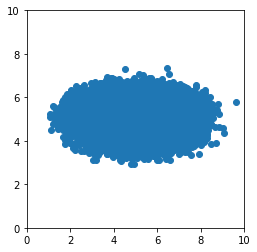

In [7]:
# First, the scatter plot of course. I set the aspect ratio equal so you can see
#   this is an ellipsoidal distribution of data

plt.scatter(x_data, y_data)

plt.gca().set_aspect('equal')
plt.xlim(0, 10)
plt.ylim(0, 10)

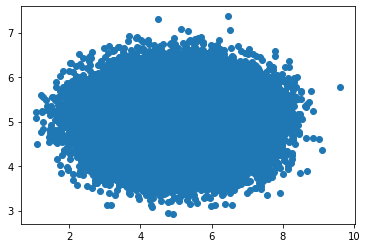

In [8]:
# Because if I don't, the auto-scaling might make you think it's circular!

plt.scatter(x_data, y_data)

(0.0, 10.0)

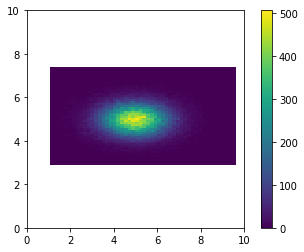

In [11]:
# But this looks like a big blob -- can we get better insight into this?
# Do a 2-D histogram. Here, try adjusting the number of bins and see how
# that affects the resolution of the histogram.

#  This returns 
counts,  x_bins, y_bins, _ = plt.hist2d(x_data, y_data, bins=50)

plt.colorbar()
plt.gca().set_aspect('equal')
plt.xlim(0, 10)
plt.ylim(0, 10)

(0.0, 10.0)

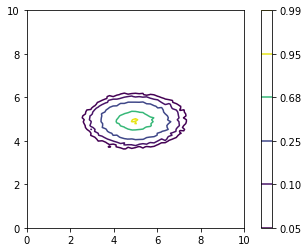

In [12]:
# And a contour plot. Here, try playing with the levels the contours are plotted
# at, or try omitting that argument entirely.

plt.contour(x_bins[:-1], y_bins[:-1], 
            counts/counts.max(), 
            levels=[0.05, 0.1, 0.25, 0.68, 0.95, 0.99])

plt.colorbar()
plt.gca().set_aspect('equal')
plt.xlim(0, 10)
plt.ylim(0, 10)

#  Projecting a distribution into  lower-dimensional space

A common early step in data analysis is dimensionality reduction from whatever high-dimensional space your data might live in.

For an example from the simulation world, say you're watching two molecules bind. From your simulation you have the full XYZ coordinates of every  atom in each molecule. But, maybe all you really  care about is the distance  between them. The first step of your analysis would involve a dimensionality reduction  from that full space of coordinates (3 * N_ATOMS coordinates), to a center of mass distance (3 coordinates).

## Simple projection

In [13]:
sample_size  = 1000

x_data_1 = np.random.normal(loc=3, scale=0.5, size=sample_size//2)
x_data_2 = np.random.normal(loc=7, scale=0.5, size=sample_size//2)

x_data = np.hstack([x_data_1, x_data_2])
y_data = np.random.normal(loc=5, scale=1.5, size=sample_size)

(0.0, 10.0)

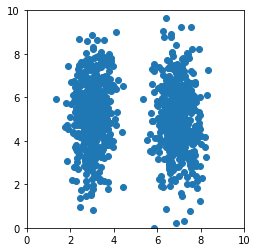

In [14]:
plt.scatter(x_data, y_data)

plt.gca().set_aspect('equal')
plt.xlim(0, 10)
plt.ylim(0, 10)

To project this to 1-dimension,  we can try projecting along either  the X coordinate or the Y coordinate.

Let's do this by making a histogram, where we're taking our coordinate of interest, breaking it  up into bins, and then adding up counts in each bin.

Text(0.5, 1.0, 'Projection along  Y')

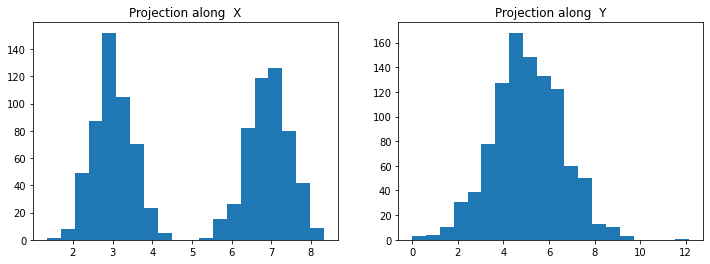

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax[0].hist(x_data, bins=20)
ax[0].set_title('Projection along  X')

ax[1].hist(y_data, bins=20)
ax[1].set_title('Projection along  Y')

Clearly, these resolve different features of the distribution.

In [29]:
# Come back to this

pca = PCA()
pca.fit(np.array([x_data, y_data]).T)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [30]:
pca.components_

array([[ 0.99999937,  0.00112492],
       [-0.00112492,  0.99999937]])

## PCA

### Preparing some sample data

First, let's generate some data and rotate it.

Pay attention to the shape of the data! There are some  subtleties with this that will become important. Right now, it's organized as `[dimension, sample]` -- in other words,  as `[[x_coord_1, x_coord_2, ...], [y_coord_1, y_coord_2, ...]]`, and NOT `[[x_coord_1, y_coord_1], [x_coord_2, y_coord_2], ...]`.

In [16]:
sample_size = 500

x_data = np.random.normal(loc=0, scale=1, size=sample_size)
y_data = np.random.normal(loc=0, scale=.5, size=sample_size)

data = np.array([x_data, y_data])
data.shape

(2, 500)

Quick note:

The `*` operator "unpacks" an array-like into arguments.

So,
`plt.scatter(*[[x_coord_1, y_coord_1], [x_coord_2, y_coord_2], ...])` 
 is just like doing 
 `plt.scatter([x_coord_1, y_coord_1], [x_coord_2, y_coord_2], ...)`.
You'll see this a lot in the context of matplotlib.

(-5.0, 5.0)

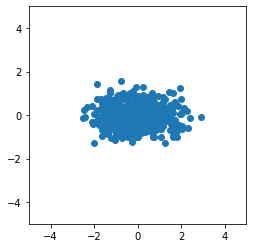

In [17]:
plt.scatter(*data)

plt.gca().set_aspect('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

Now let's rotate that data a little,  and plot that.

In [18]:
# Rotate by Pi/3 radians
rotation_radians = np.pi/3

# Build a rotation matrix, and use it to rotate our coords about the origin
rotation_matrix = np.array([[
                            np.cos(rotation_radians), -np.sin(rotation_radians)],
                            [np.sin(rotation_radians), np.cos(rotation_radians)]
])
rotated_data = rotation_matrix @ data

(-5.0, 5.0)

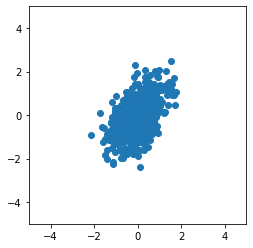

In [19]:
plt.scatter(*rotated_data)

plt.gca().set_aspect('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

### 2-D component analysis

Now, let's estimate  the principal  axes of this data. Imagine we're starting with the rotated data -- how can we separate out the original x and y axes?

In [20]:
from sklearn.decomposition import PCA

Here, we'll do the PCA decomposition.

Remember  that our data was originally in the  shape `[dimension, sample]`. For PCA, we  need it in `[sample, dimension]`.

Think of it like a list of observations. Each observation has 2 numbers associated with it (the coordinates).

Here, you can explicitly specify `PCA(n_components=2)`, but it should automatically detect that 2 components works best.

In [22]:
rotated_data.T.shape

(500, 2)

In [23]:
pca = PCA()
pca.fit(rotated_data.T)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

That was easy!

Now let's look at the components in their vector form, and  the amount of total variance each component  explains

In [24]:
pca.components_

array([[ 0.49902547,  0.86658732],
       [-0.86658732,  0.49902547]])

In [25]:
pca.explained_variance_ratio_

array([0.78894168, 0.21105832])

The PCA rotation matrix should be pretty similar to the inverse of the rotation  matrix (and should get closer with more samples!)

In [ ]:
np.linalg.inv(rotation_matrix)

Slight detour for a cell:

Implicitly, we know that when you write down the component vectors as  in `pca.components_`, they start at the origin.

To plot them, however, we're using the function `plt.scatter(x_data, y_data, ...)`,  so  we need to have the origin explicitly in the data. Let's make both component vectors start  at [0,0].

In [26]:
pc1_vectors = np.array([
                         [0,0], 
                         pca.components_[0]
                        ])

pc2_vectors = np.array([
                         [0,0], 
                         pca.components_[1]
                        ])

# Now, you can see we have an array of [[x0, y0], [x1, y1]]
pc1_vectors

array([[0.        , 0.        ],
       [0.49902547, 0.86658732]])

Let's visualize these components over our data. With enough samples, these should describe it pretty well.

I've also shown in the legend the percentage of  total  variance each PC describes. Note which one is higher.

(-5.0, 5.0)

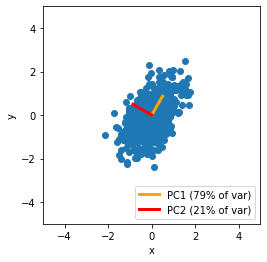

In [27]:
# To make the component lines longer, try multiplying by some scalar

plt.plot(*pc1_vectors.T, color='orange', linewidth=3, 
         label=f'PC1 ({pca.explained_variance_ratio_[0]*100:.0f}% of var)')

plt.plot(*pc2_vectors.T, color='red', linewidth=3, 
         label=f'PC2 ({pca.explained_variance_ratio_[1]*100:.0f}% of var)')

plt.scatter(*rotated_data)
plt.legend(loc='lower right')

plt.xlabel('x')
plt.ylabel('y')

plt.gca().set_aspect('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

Now, let's re-plot our data in PCA space. This should remove the rotation we added in.

(Note that this might be reflected over one or  both axes from the initial data)

(-5.0, 5.0)

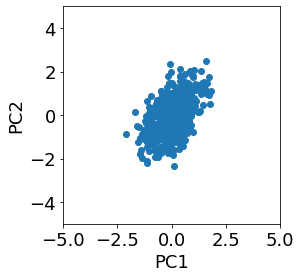

In [42]:
pca_data = pca.transform(rotated_data.T)

plt.scatter(*pca_data.T)

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.gca().set_aspect('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# Aside: Prettier plotting with Matplotlib

I've used a few of matplotlib's different plotting/formatting options in the notebook up to here, but let me explicitly show a few more examples.

## Scatter plots and colormaps

In addition to plotting points with a list of x values and a list of y values, you can also color them according to a "z" value, which goes in the `c` argument of `plt.scatter()`.

Below, I plot the PCA-transformed data, colored by the x-coordinate in the original basis.**bold text**

**NOTE:** Colormaps are not a unique concept to scatter plots. You can use them in line plots or contour plots as well, in the same way. I'm just demonstrating here with our same dataset.

(-5.0, 5.0)

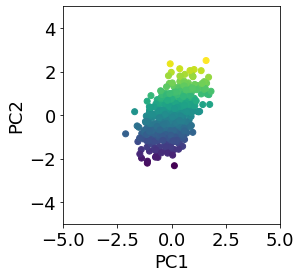

In [43]:
# pca_data = pca.transform(rotated_data.T)

x_positions = rotated_data[1]
plt.scatter(*pca_data.T, c=x_positions)

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.gca().set_aspect('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

Matplotlib specifies different 'colormaps' for this coloring. (It automatically normalizes your data, but you can set limits for the colormap range with `vmin` and `vmax`.

The main thing to know about colormaps is there are a few types, which you can read about [in the matplotlib documentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html#classes-of-colormaps).

The type I probably use the most are "diverging", which have a visually distinct center point, and different colors in each direction out. I like 'seismic' in particular, which is white in the middle, red at one end, and blue at the other.

We'll plot this same data with the colorbar shown. Note I assign the scatter plot object to a variable, and then pass that to the colorbar so the colorbar knows what colormap and range of values is being used.

In [32]:
from matplotlib import cm

(-5.0, 5.0)

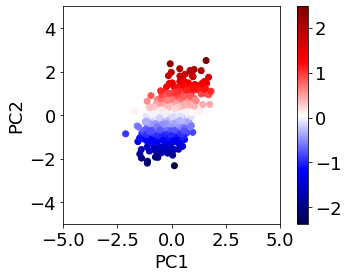

In [44]:
cmap = cm.get_cmap('seismic')

pca_data = pca.transform(rotated_data.T)

x_positions = rotated_data[1]
sc = plt.scatter(*pca_data.T, c=x_positions, cmap=cmap)
plt.colorbar(sc)

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.gca().set_aspect('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

You can see the colormap isn't centered -- our data isn't perfectly centered in x. By specifying vmin and vmax to be evenly spaced around 0, we can fix that.

(-5.0, 5.0)

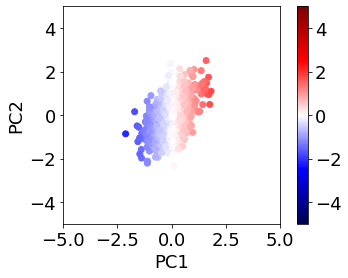

In [45]:
cmap = cm.get_cmap('seismic')

pca_data = pca.transform(rotated_data.T)

x_positions = rotated_data[0]
sc = plt.scatter(*pca_data.T, c=x_positions, cmap=cmap, vmin=-5, vmax=5)
plt.colorbar(sc)

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.gca().set_aspect('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

## Subplots, tick formatting, and shared axes

Up to now, I've been using `plt.plot` to plot everything. This is sort of using a global instance of matplotlib.

You can get a lot finer control over your plots by using `Figure` and `Axis` objects. A figure is like the whole plot you see, and can contain multiple sets of axes.

Note that when we're working with axes objects, instead of the global `plt` instance, we have to use `axis.set_xlabel()` instead of `plt.xlabel()`. Most formatting commands follow that pattern.

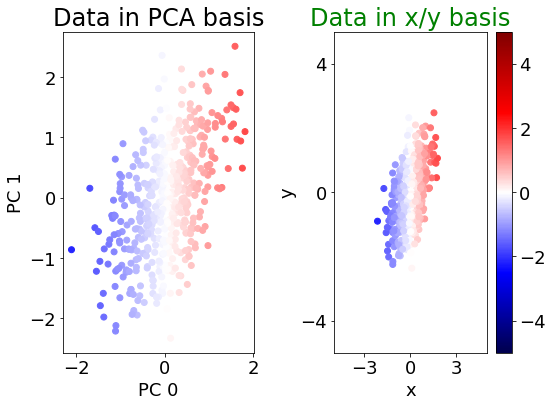

In [46]:
# Create a figure
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8,6))

axes[0].scatter(*pca_data.T, c=x_positions, cmap=cmap, vmin=-5, vmax=5)
axes[0].set_xlabel('PC 0')
axes[0].set_ylabel('PC 1')
axes[0].set_title("Data in PCA basis", fontsize=24)


sc = axes[1].scatter(*rotated_data, c=x_positions, cmap=cmap, vmin=-5, vmax=5, label='test')
axes[1].set_xlabel('x', fontsize=18)
axes[1].set_ylabel('y', fontsize=18)
axes[1].set_xlim([-5, 5])
axes[1].set_ylim([-5, 5])
axes[1].set_title("Data in x/y basis", fontsize=24, color='green')

# Explicitly set some parameters for the ticks
axes[1].set_xticks([-3, 0, 3])
axes[1].set_yticks([-4, 0, 4])
axes[1].tick_params(labelsize=18)


# Colorbar must be created at the figure level
fig.colorbar(sc)

# This just condenses some of the padding around plots.
# I throw this in often to help manage whitespace.
fig.tight_layout()

(That plot isn't meant to look pretty! Just an example of some of the things you can do.)

Two final things about axes.

Changing scales (i.e., from linear, to log, or matplotlib's "symlog" which is like log, but linear in a small range around 0)

Matplotlib also makes it easy to use dual axes on one plot.

Below, I demonstrate both of those, along with line styling (width and dashing).

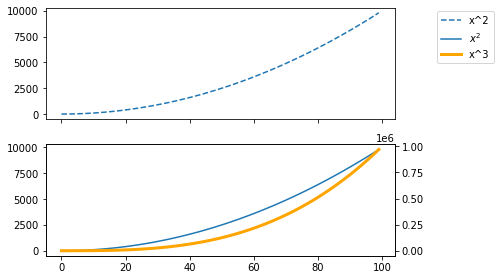

In [39]:
# Two plots on top of each other, which share their x axes
# (Note the x-tick labels aren't duplicated)
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)

x_values = np.arange(0,100)

# Plot x^2 on the top plot
ax[0].plot(x_values, x_values**2, linestyle='--', label="x^2")


# On the bottom, plot x^2 and x^3 on a shared x-axis.

# You can use TeX in labels too!
ax[1].plot(x_values, x_values**2, label="$x^2$")
# Make a new axis on the bottom plot that shares the x-axis
ax1_twin = ax[1].twinx()
ax1_twin.plot(x_values, x_values**3, linewidth=3, color='orange', label="x^3")

# By default, the legend will be weirdly sticking in the plot. 
# Let's put the upper-left corner of the legend at (100%, 95%)
#   relative to the x-axis and y-axis respectively.
fig.legend(loc='upper left', bbox_to_anchor=(1.0,0.95))

# Make sure the legend isn't cut off by doing tight_layout
fig.tight_layout()

## Wrap-up

Let's combine this all to make a pretty plot of our rotated data.


In [40]:
import matplotlib as mpl

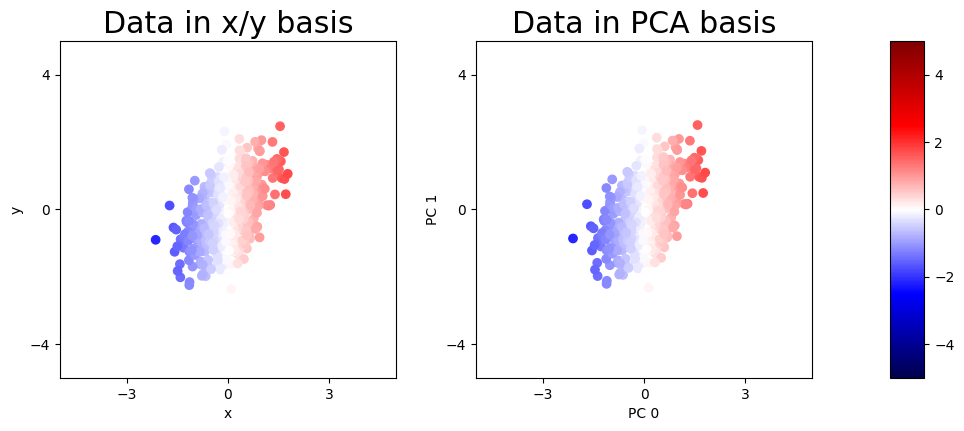

In [41]:
# Create a figure
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(10,4.5),
                         # Make a small column for the colorbar
                         gridspec_kw={'width_ratios':[1,1,0.1]})

# Globally set font used to 18 -- 'rc' sets global plot formatting options
plt.rc('font', size=18)

axis = axes[0]
sc = axis.scatter(*rotated_data, c=x_positions, cmap=cmap, vmin=-5, vmax=5, label='test')
axis.set_ylabel('y')
axis.set_xlabel('x')
axis.set_title("Data in x/y basis")
axis.set_aspect('equal')

axis = axes[1]
axis.scatter(*pca_data.T, c=x_positions, cmap=cmap, vmin=-5, vmax=5)
axis.set_xlabel('PC 0')
axis.set_ylabel('PC 1')
axis.set_title("Data in PCA basis")
axis.set_aspect('equal')

for axis in axes:
  axis.set_xlim([-5, 5])
  axis.set_ylim([-5, 5])

  # Explicitly set some parameters for the ticks
  axis.set_xticks([-3, 0, 3])
  axis.set_yticks([-4, 0, 4])


# Colorbar must be created at the figure level
fig.colorbar(sc, cax=axes[2])

# This just condenses some of the padding around plots.
# I throw this in often to help manage whitespace.
fig.tight_layout()

# Change the resolution of the figure -- this interplays with figsize
fig.set_dpi(100)

## Further reference

This really just scratches the surface of what you can do with Matplotlib -- the main idea is, you can basically do anything!

For further reference, the Matplotlib documentation is a really good reference and also has lots of good examples and demo scripts.

[Scatter plot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

[Line plot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

[Various examples](https://matplotlib.org/stable/gallery/index.html)

[Tutorials](https://matplotlib.org/stable/tutorials/index.html)

(And that's just from their official website!)

In [ ]:
# Non-linear dimensionality reduction ... and on to ML (Jeremy)

In [ ]:
# where to fit into exacloud?  First class or not?  Nick?